In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
rcParams.update({'figure.autolayout': True})
import csv




In [2]:
# Read mean profiles

cat = [1, 2, 3, 4, 5]

WindCat     = [np.delete(np.genfromtxt(f"les_data/CAT{c}/mean_UV.txt",      skip_header=1, delimiter=","), 2, axis=1) for c in cat]
WindDirCat  = [np.delete(np.genfromtxt(f"les_data/CAT{c}/mean_wDir.txt",    skip_header=1, delimiter=","), 2, axis=1) for c in cat]
std_uv   = [np.delete(np.genfromtxt(f"les_data/CAT{c}/std_UV.txt", skip_header=1, delimiter=","), 2, axis=1) for c in cat]
L_Cat       = [np.delete(np.genfromtxt(f"les_data/CAT{c}/L_U_strmws.txt",   skip_header=1, delimiter=","), 2, axis=1) for c in cat]

# Create a new height
z=np.linspace(10,320,50)
# Interpolate to the new z
wind_cat_interp = [np.interp(z, WindCat[c-1][:,0], WindCat[c-1][:,1]) for c in cat]
wind_dir_interp = [np.interp(z, WindDirCat[c-1][:,0], WindDirCat[c-1][:,1]) for c in cat]
std_uv_interp =[np.interp(z, std_uv[c-1][:,0], std_uv[c-1][:,1]) for c in cat]
L_interp =[np.interp(z, L_Cat[c-1][:,0], L_Cat[c-1][:,1]) for c in cat]

In [3]:
# Read spectra

cat = [1, 2, 3, 4, 5]

u_spectrum    = [np.delete(np.genfromtxt(f"les_data/CAT{c}/spectra_U_strmws.txt",      skip_header=1, delimiter=","), 2, axis=1) for c in cat]
v_spectrum  = [np.delete(np.genfromtxt(f"les_data/CAT{c}/spectra_U_crsstrm.txt",    skip_header=1, delimiter=","), 2, axis=1) for c in cat]
w_spectrum     = [np.delete(np.genfromtxt(f"les_data/CAT{c}/spectra_W.txt", skip_header=1, delimiter=","), 2, axis=1) for c in cat]
uw_spectrum      = [np.delete(np.genfromtxt(f"les_data/CAT{c}/spectra_WU_strmws.txt",   skip_header=1, delimiter=","), 2, axis=1) for c in cat]

# Create a new height
fr=np.linspace(0.001666,0.3,300)
# Interpolate to the new z
u_spectrum_interp = [np.interp(fr, u_spectrum[c-1][:,0], u_spectrum[c-1][:,1]) for c in cat]
v_spectrum_interp = [np.interp(fr, v_spectrum[c-1][:,0], v_spectrum[c-1][:,1]) for c in cat]
w_spectrum_interp  =[np.interp(fr, w_spectrum[c-1][:,0], w_spectrum[c-1][:,1]) for c in cat]
uw_spectrum_interp  =[np.interp(fr, uw_spectrum[c-1][:,0], uw_spectrum[c-1][:,1]) for c in cat]

/var/folders/nm/4fyg8_2n6_sfsb0n04gxxrdrphjvsx/T/ipykernel_786/643076612.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", num_categories)


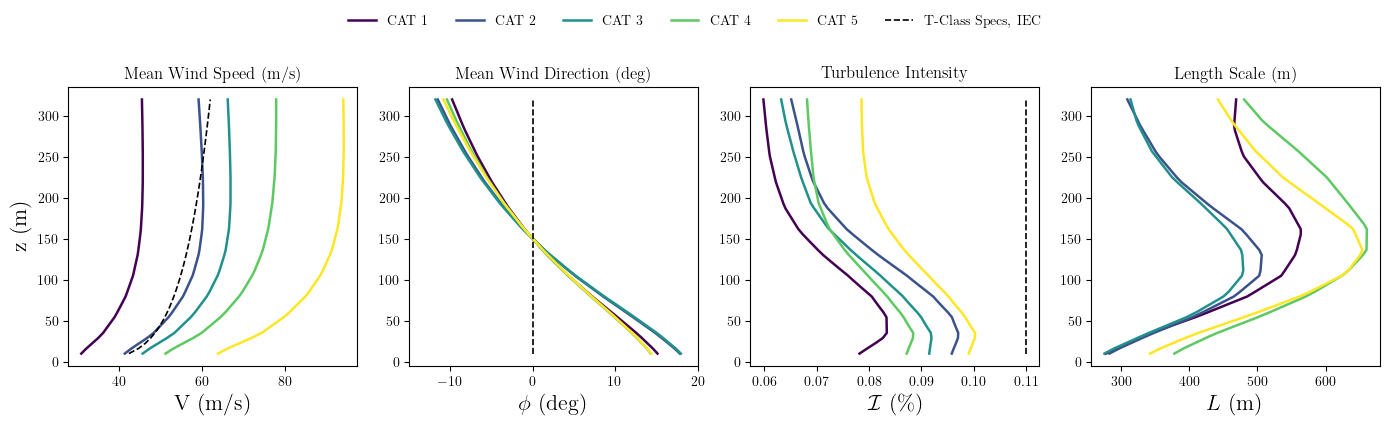

In [4]:
import seaborn as sns
# Set a professional-looking style
#sns.set_style("whitegrid")      # options: white, dark, whitegrid, darkgrid, ticks
#sns.set_context("talk")         # sets font sizes ("paper", "notebook", "talk", "poster")

# Create a color palette so each category has a consistent color across subplots
# Create a color palette from viridis so each category has a distinct color
num_categories = 5
cmap = plt.cm.get_cmap("viridis", num_categories)  
palette = [cmap(i) for i in range(num_categories)]

fig, axs = plt.subplots(1, 4, figsize=(14, 4))
plt.subplots_adjust(wspace=0.3)  # Increase horizontal spacing between subplots


# --- Subplot 1: Mean Wind Speed ---
# Plot each category with a distinct color from the palette
for c in cat:
    axs[0].plot(wind_cat_interp[c-1][:], z, '-', color=palette[c-1], 
            label=f"CAT {c}", linewidth=1.8, markerfacecolor='none')

# Plot T-Class Specs, IEC
axs[0].plot(57*(z/150)**0.11, z, '--', color='k', 
            label='T-Class Specs, IEC', linewidth=1.2)

axs[0].set_title('Mean Wind Speed (m/s)')
axs[0].set_xlabel("V (m/s)", fontsize=16)
axs[0].set_ylabel("z (m)", fontsize=16)

# --- Subplot 2: Mean Wind Direction ---
for c in cat:
    axs[1].plot(wind_dir_interp[c-1][:], z, '-', color=palette[c-1],
            label=f"CAT {c}", linewidth=1.8, markerfacecolor='none')

axs[1].plot(0*wind_dir_interp[0][:], z, '--', color='k', linewidth=1.2)

axs[1].set_title('Mean Wind Direction (deg)')
axs[1].set_xlabel(r"$\phi$ (deg)", fontsize=16)
axs[1].set_xlim(-15, 20)

# --- Subplot 3: Turbulence Intensity ---
for c in cat:
    axs[2].plot(std_uv_interp[c-1][:]/wind_cat_interp[c-1][:], z, '-', color=palette[c-1], linewidth=1.8)

# Plot reference line for 0.11
axs[2].plot([0.11]*len(z), z, '--', color='k', linewidth=1.2)

axs[2].set_title('Turbulence Intensity')
axs[2].set_xlabel(r'$\mathcal{I}$ (\%)', fontsize=16)

# --- Subplot 4: Length Scale ---
for c in cat:
    axs[3].plot(L_interp[c-1][:], z, '-', color=palette[c-1], linewidth=1.8, markerfacecolor='none')

axs[3].set_title('Length Scale (m)')
axs[3].set_xlabel(r'$L$ (m)', fontsize=16)

# Collect all lines and labels from each subplot
lines_labels = [ax.get_legend_handles_labels() for ax in axs]
lines, labels = [sum(tup, []) for tup in zip(*lines_labels)]  # flatten the lists

# Remove duplicate labels while preserving order
unique_labels = []
unique_lines = []
for lab, line in zip(labels, lines):
    if lab not in unique_labels:
        unique_labels.append(lab)
        unique_lines.append(line)

# Create one legend for the entire figure at the top
fig.legend(unique_lines,
           unique_labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.07),  # Adjust upward/downward as needed
           ncol=num_categories+1,         # number of columns in the legend
           frameon=False)

# Use tight_layout and adjust rect to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space at the top for the legend

plt.savefig('subplots_mean_wind_fields.pdf',format='pdf',dpi=300,bbox_inches='tight')


In [5]:
turbsim_banner = """---------TurbSim v2.00.* Profile Input File------------------------
Made up profiles
-------- User-Defined Profiles (Used only with USR wind profile or USRVKM spectral model) -------------------
50               NumUSRz        - Number of Heights
1.092           StdScale1      - u-component scaling factor for the input standard deviation
1.0             StdScale2      - v-component scaling factor for the input standard deviation
0.534           StdScale3      - w-component scaling factor for the input standard deviation
-----------------------------------------------------------------------------------
Height    Wind Speed       Wind --Angle--        Standard Deviation    Length Scale
 (m)        (m/s)      (deg, cntr-clockwise )              (m/s)              (m)
-----------------------------------------------------------------------------------
"""

for c in cat:
# Combine arrays into one 2D array (rows × columns)
    data = np.column_stack((z,wind_cat_interp[c-1],wind_dir_interp[c-1],std_uv_interp[c-1],L_interp[c-1]))
    # Save to a text file with space as the delimiter
    with open(f"TurbSim_CAT{c}.profiles", "w") as f:
        f.write(turbsim_banner)
        np.savetxt(f, data, fmt='%g', delimiter='    ')

In [7]:
#Normalize spectra

sigma_u=[np.trapz(u_spectrum_interp[c-1],fr) for c in cat]
sigma_v=[np.trapz(v_spectrum_interp[c-1],fr) for c in cat]
sigma_w=[np.trapz(w_spectrum_interp[c-1],fr) for c in cat]

print(sigma_u)

[9.573635350899805, 21.983638670020383, 25.579519320487993, 32.307758195771115, 61.75257415007568]


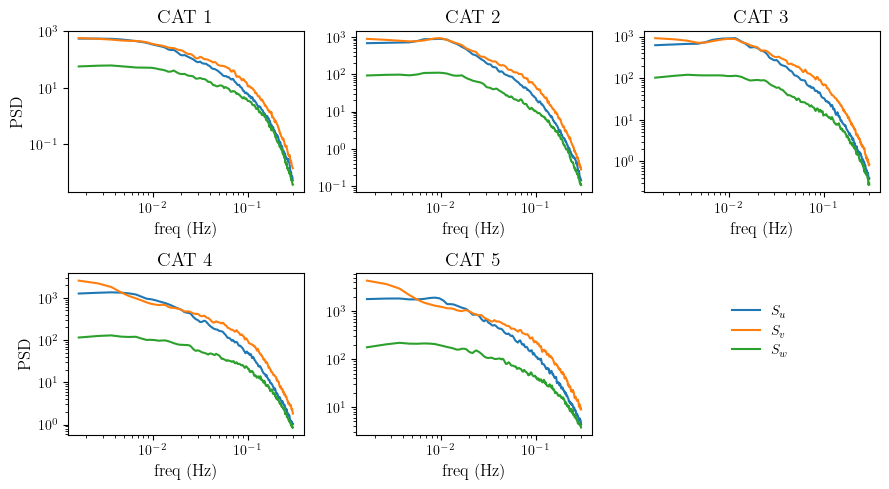

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(9, 5))
axs = axs.flatten()
for c in cat:
    axs[c-1].loglog(fr,u_spectrum_interp[c-1],
            label=r'$S_u$')
    axs[c-1].loglog(fr,v_spectrum_interp[c-1],
            label=r"$S_v$")
    axs[c-1].loglog(fr,w_spectrum_interp[c-1],
            label=r"$S_w$")
    axs[c-1].set_title(rf"CAT {c}",fontsize=14)
    axs[c-1].set_xlabel(r'freq (Hz)', fontsize=12)

axs[-1].set_visible(False)
axs[0].set_ylabel(r'PSD', fontsize=12)
axs[3].set_ylabel(r'PSD', fontsize=12)       
# Create one legend for the entire figure at the top
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(
    lines,
    labels,
    loc='lower center',      # original location example
    bbox_to_anchor=(0.85, 0.25),
    ncol=1,
    frameon=False
)

plt.savefig('subplots_spectra.pdf',format='pdf',dpi=300,bbox_inches='tight')



In [9]:
turbsim_banner = """-------- User-Defined Spectra (Used only with USRINP spectral model) ----------------
-        The Kaimal spectra IEC 61400-1 Ed. 3 for Vhub=12 m/s; Zhub=90 m; Class="B";                    -
---------------------------------------------------------------------------------------------------------
300             NumUSRf        - Number of Frequencies [dictates how many lines to read from this file]
1.0             SpecScale1     - scaling factor for the input u-component spectrum
2.0             SpecScale2     - scaling factor for the input v-component spectrum
1.0             SpecScale3     - scaling factor for the input w-component spectrum
.........................................................................................................
Frequency    u-component PSD   v-component PSD      w-component PSD
(Hz)           (m^2/s)           (m^2/s)             (m^2/s)
---------------------------------------------------------------------------------------------------------
"""

for c in cat:
# Combine arrays into one 2D array (rows × columns)
    data = np.column_stack((fr,u_spectrum_interp[c-1],v_spectrum_interp[c-1],w_spectrum_interp[c-1]))
    # Save to a text file with space as the delimiter
    with open(f"TurbSim_CAT{c}.spectra", "w") as f:
        f.write(turbsim_banner)
        np.savetxt(f, data, fmt='%g', delimiter='    ')